In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [15]:
occ_diff = pd.read_csv('difference_occupancy.csv')

In [16]:
occ_diff

,Unnamed: 0,11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST,15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST,1ST AVE BETWEEN BELL ST AND BATTERY ST,2ND AVE BETWEEN LENORA ST AND BLANCHARD ST,6TH AVE N BETWEEN JOHN ST AND THOMAS ST,7TH AVE BETWEEN OLIVE WAY AND STEWART ST,BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST,EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST,FAIRVIEW AVE N BETWEEN JOHN ST AND THOMAS ST,FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST,MINOR AVE BETWEEN HOWELL ST AND STEWART ST,ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N
0,2022-03-21 08:00:00,0.464,0.286,0.250,0.625,-0.316,0.75,0.667,0.417,0.084,0.291,0.384,0.250
1,2022-03-21 08:01:00,0.464,0.286,0.250,0.625,-0.316,0.75,0.667,0.417,0.084,0.291,0.384,0.250
2,2022-03-21 08:02:00,0.429,0.143,0.250,0.625,-0.369,0.75,0.667,0.417,0.084,0.291,0.231,0.167
3,2022-03-21 08:03:00,0.429,0.143,0.250,0.625,-0.369,0.75,0.667,0.417,0.084,0.291,0.154,0.167
4,2022-03-21 08:04:00,0.429,0.143,0.250,0.625,-0.369,0.75,0.667,0.417,0.084,0.291,0.154,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2022-03-28 19:55:00,0.714,0.571,-0.250,0.500,0.000,-0.25,0.000,0.000,0.250,0.250,0.846,0.000
5036,2022-03-28 19:56:00,0.714,0.714,-0.250,0.500,0.000,-0.25,0.000,0.000,0.333,0.250,0.846,0.000
5037,2022-03-28 19:57:00,0.714,0.714,-0.250,0.500,0.000,-0.25,0.000,0.000,0.333,0.250,0.846,0.000
5038,2022-03-28 19:58:00,0.714,0.714,-0.167,0.500,0.000,-0.25,0.000,0.000,0.333,0.250,0.846,0.000


In [36]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [37]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [55]:
# Create list of labels (block name and date) and corresponding occupancy difference throughout the days
label = []
X = []
rows = occ_diff.shape[0]
columns = occ_diff.shape[1]
for i in range(12):
    for j in range(7):
        date = pd.Timestamp(occ_diff.iloc[j*720,0]).strftime('%Y/%m/%d')
        label.append(occ_diff.columns[i+1] + ' ' + date)
        day = []
        for k in range(12):
            day.append(np.average(np.array(occ_diff.iloc[j*720+k*60:(j*720+(k+1)*60),i+1])))
        X.append(day)

print(label[7])
print(X[7])
print(np.average(np.array(occ_diff.iloc[60:120,2])))

15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/21
[0.10724999999999998, -0.011916666666666666, 0.31886666666666674, 0.05478333333333332, 0.07138333333333331, -0.07401666666666666, 0.09049999999999998, 0.3732166666666667, 0.17606666666666665, 0.15253333333333335, -0.06196666666666665, 0.05719999999999998]
-0.011916666666666666


In [56]:
label_export = pd.DataFrame(label)
print(label_export.iloc[0,0])

11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21


In [57]:
#label_export.to_csv('./block_names.csv')

In [58]:
# Cluster occupancy difference data to 5 clusters
kmeans = KMeans(n_clusters=5)

In [59]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [60]:
clusters = kmeans.predict(X)
print(clusters)

[4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 4 3 2 2 2 2 2 0 2 1 1
 0 0 1 4 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 4 1 4 4 4 4
 4 4 4 1 1 1 1 1 1 1]


In [61]:
# To visualize the data use PCA to reduce dimension to 2 and plot scatter plot
pca_2d = PCA(n_components=2)
PCA_2d = pca_2d.fit_transform(X)

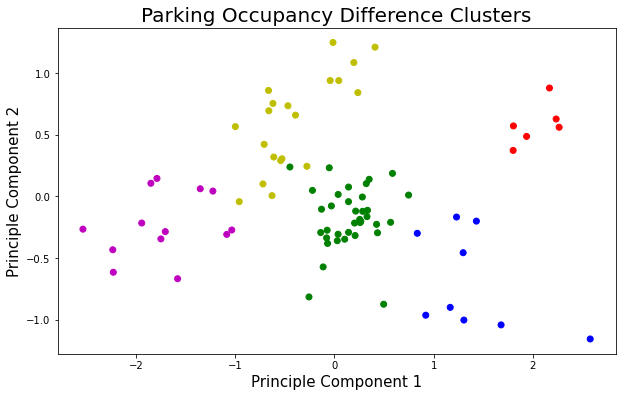

In [62]:
colors = ['b', 'g', 'r', 'm', 'y']
color_map = []
for index in clusters:
    color_map.append(colors[index])
plt.figure(figsize=(10,6))
plt.scatter(PCA_2d[:,0], PCA_2d[:,1], color=color_map)
plt.title("Parking Occupancy Difference Clusters", fontsize=20)
plt.ylabel("Principle Component 2", fontsize=15)
plt.xlabel("Principle Component 1", fontsize=15)
plt.show()

In [63]:
# Sort all the block names and date of each cluster into their own list
cluster_names = {0: [],
                 1: [],
                 2: [],
                 3: [],
                 4: []}

for i in range(len(label)):
    index = clusters[i]
    cluster_names[index].append(label[i])
        

In [64]:
# Convert cluster lists to dataframe to be exported as csv to read
occ_clusters = pd.DataFrame.from_dict(cluster_names, orient='index').transpose()


In [65]:
#occ_clusters.to_csv('./clusters.csv')

In [66]:
# Sort corresponding occupancy difference throughout the days to their own cluster list
cluster_occ_diff = {0: [],
                    1: [],
                    2: [],
                    3: [],
                    4: []}

cluster_occ_X =  {0: [],
                  1: [],
                  2: [],
                  3: [],
                  4: []}

cluster_occ_Y =  {0: [],
                  1: [],
                  2: [],
                  3: [],
                  4: []}

for i in range(len(label)):
    index = clusters[i]
    cluster_occ_diff[index].append(np.array(X[i]))
    cluster_occ_X[index].append(np.array(X_data[i]))
    cluster_occ_Y[index].append(np.array(Y_data[i]))

In [67]:
# Take the over average occupancy difference throughout the days for each clusters
avg_cluster1 = np.average(cluster_occ_diff[0], axis=0)
avg_cluster2 = np.average(cluster_occ_diff[1], axis=0)
avg_cluster3 = np.average(cluster_occ_diff[2], axis=0)
avg_cluster4 = np.average(cluster_occ_diff[3], axis=0)
avg_cluster5 = np.average(cluster_occ_diff[4], axis=0)

c1_occ_X = np.average(cluster_occ_X[0], axis=0)
c2_occ_X = np.average(cluster_occ_X[1], axis=0)
c3_occ_X = np.average(cluster_occ_X[2], axis=0)
c4_occ_X = np.average(cluster_occ_X[3], axis=0)
c5_occ_X = np.average(cluster_occ_X[4], axis=0)

c1_occ_Y = np.average(cluster_occ_Y[0], axis=0)
c2_occ_Y = np.average(cluster_occ_Y[1], axis=0)
c3_occ_Y = np.average(cluster_occ_Y[2], axis=0)
c4_occ_Y = np.average(cluster_occ_Y[3], axis=0)
c5_occ_Y = np.average(cluster_occ_Y[4], axis=0)

time = np.arange(720)

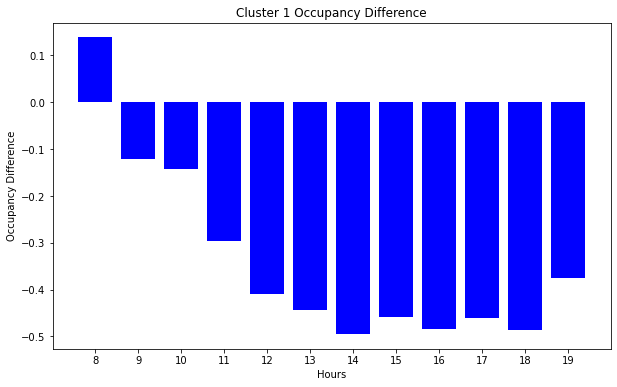

In [68]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 1 Occupancy Difference")
plt.bar(paid_hour, avg_cluster1, color=colors[0])
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.xticks(paid_hour)
plt.show()

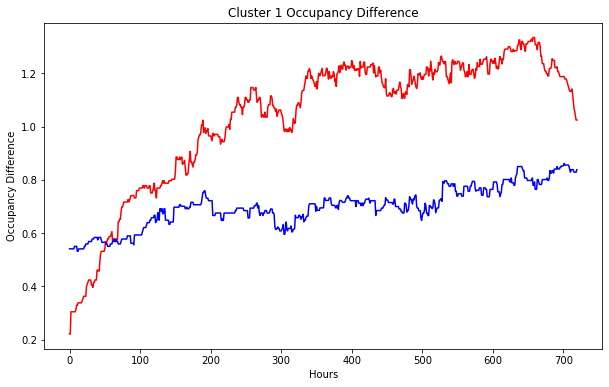

In [69]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 1 Occupancy Difference")
plt.plot(time, c1_occ_X, color='red')
plt.plot(time, c1_occ_Y, color='blue')
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.show()

In [70]:
print(cluster_names[0])

['1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/22', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/23', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/24', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/25', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/26', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/28', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/26', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/23', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/24']


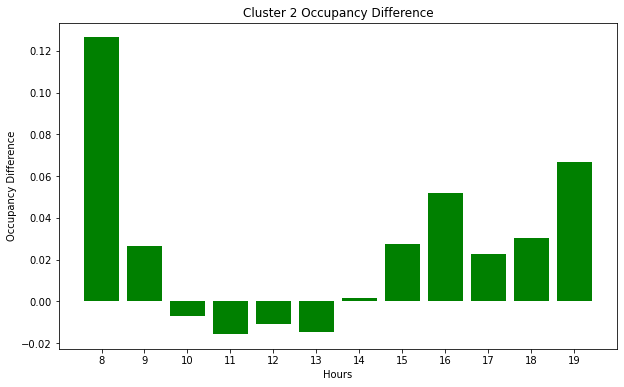

In [71]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 2 Occupancy Difference")
plt.bar(paid_hour, avg_cluster2, color=colors[1])
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.xticks(paid_hour)
plt.show()

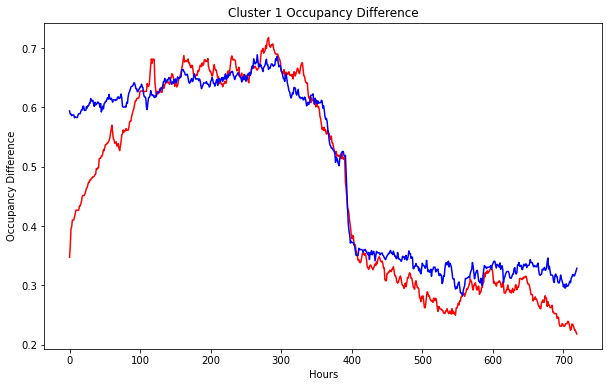

In [72]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 1 Occupancy Difference")
plt.plot(time, c2_occ_X, color='red')
plt.plot(time, c2_occ_Y, color='blue')
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.show()

In [73]:
print(cluster_names[1])

['15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/21', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/22', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/23', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/24', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/25', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/26', '15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST 2022/03/28', '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/21', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/21', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/22', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/25', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/28', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/21', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/22', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/23', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/24', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/25', 'EASTLAKE AVE E 

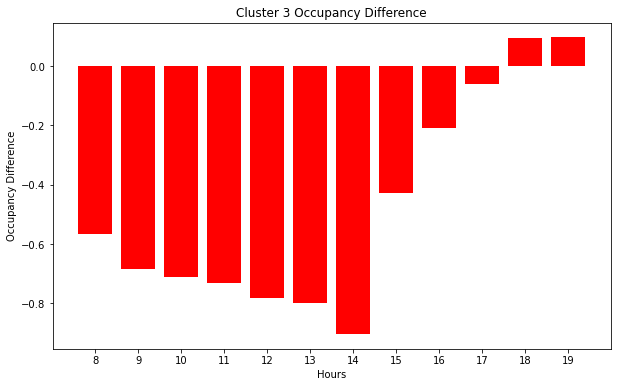

In [74]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 3 Occupancy Difference")
plt.bar(paid_hour, avg_cluster3, color=colors[2])
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.xticks(paid_hour)
plt.show()

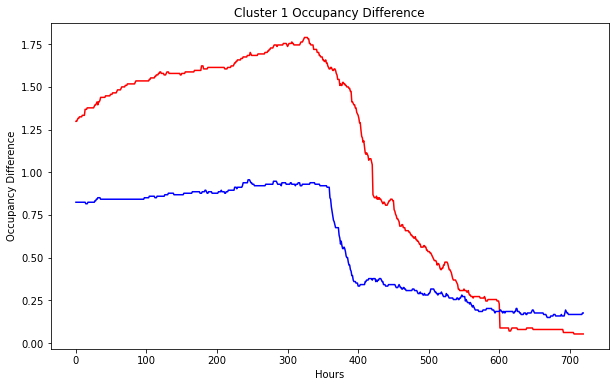

In [75]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 1 Occupancy Difference")
plt.plot(time, c3_occ_X, color='red')
plt.plot(time, c3_occ_Y, color='blue')
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.show()

In [76]:
print(cluster_names[2])

['6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/21', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/22', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/23', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/24', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/25', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/28']


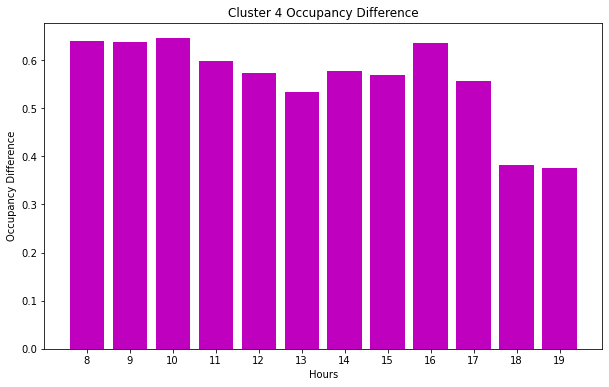

In [77]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 4 Occupancy Difference")
plt.bar(paid_hour, avg_cluster4, color=colors[3])
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.xticks(paid_hour)
plt.show()

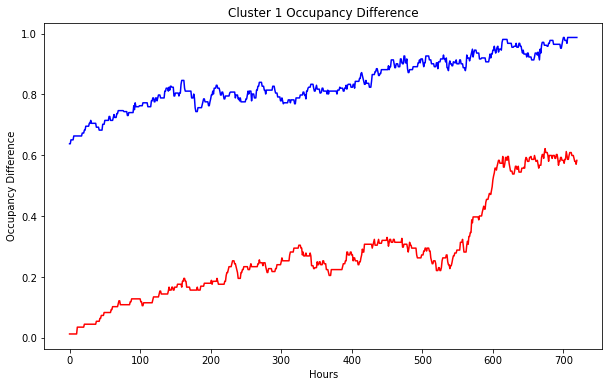

In [78]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 1 Occupancy Difference")
plt.plot(time, c4_occ_X, color='red')
plt.plot(time, c4_occ_Y, color='blue')
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.show()

In [79]:
print(cluster_names[3])

['2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/21', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/22', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/23', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/24', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/25', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/28', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/21', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/22', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/23', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/24', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/25', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/26', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/28']


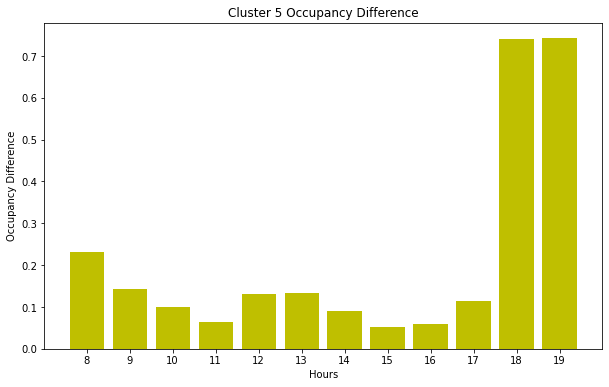

In [83]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 5 Occupancy Difference")
plt.bar(paid_hour, avg_cluster5, color=colors[4])
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.xticks(paid_hour)
plt.show()

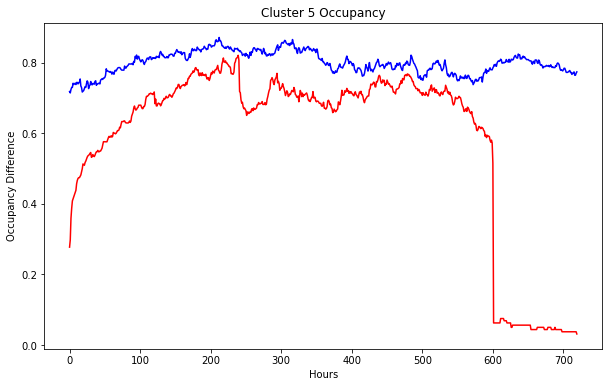

In [84]:
plt.figure(figsize=(10,6))
paid_hour = np.arange(8,20,1)
plt.title("Cluster 5 Occupancy")
plt.plot(time, c5_occ_X, color='red')
plt.plot(time, c5_occ_Y, color='blue')
plt.ylabel("Occupancy Difference")
plt.xlabel("Hours")
plt.show()

In [81]:
print(cluster_names[4])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26', '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/26', '7TH AVE BETWEEN OLIVE WAY AND STEWART ST 2022/03/26', 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/22', 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/24', 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/25', 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/26', 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST 2022/03/21', 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST 2022/03/22', 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST 2022/03/23', 'MINOR AVE BETWEEN HOWELL ST